## Article : Audio Source Separation Using Non-Negative Matrix Factorization (NMF)
https://medium.com/@zahrahafida.benslimane/audio-source-separation-using-non-negative-matrix-factorization-nmf-a8b204490c7d

Séparation de sources sonores, une technique qui permet d’isoler différentes sources sonores présentes dans un mélange de sons. Cette méthode a plusieurs applications, notamment :

- la séparation musicale (par exemple, isoler les instruments d’une chanson pour les remixer),

- la séparation de la parole (identifier différents locuteurs dans un enregistrement),

- et l’amélioration de la parole (séparer la voix du bruit de fond ou de la musique).

L’article présente une méthode simple pour résoudre ce problème de séparation audio, et propose un programme Python permettant d’extraire les notes jouées dans une courte séquence de piano.

![Texte alternatif](https://miro.medium.com/v2/resize:fit:1100/format:webp/1*3ZHtbPx95Q1BNkOS4WQvGA.png)


Ce problème, connu sous le nom de "Cocktail Party Problem", est aujourd’hui majoritairement abordé à l’aide de méthodes d’apprentissage profond.

Cependant, ici, on va utiliser une approche plus classique et simple.

L’un des algorithmes les plus populaires pour ce type de tâche en traitement du signal est la Factorisation en Matrices Non-Négatives (NMF), une méthode rendue célèbre par les travaux de Daniel D. Lee et H. Sebastian Seung.

### Principe de la NMF :

L’objectif est de factoriser une matrice de données V (connue) en deux matrices inconnues W et H, toutes deux non-négatives, telles que :

![Texte alternatif](https://miro.medium.com/v2/resize:fit:182/format:webp/1*5hrG-mw3dPrJnYHfXlhsqg.png)

Ce qui distingue la NMF d’autres méthodes comme la PCA (analyse en composantes principales), c’est cette contrainte de non-négativité, qui rend les résultats souvent plus interprétables, notamment dans les signaux audio.

![Texte alternatif](https://miro.medium.com/v2/resize:fit:1100/format:webp/1*r7JKOWSutM3fasmBQotBGQ.png)

### Application à la séparation de sources sonores :

- V représente le spectrogramme du signal audio (représentation temps-fréquence).

- W est le dictionnaire des motifs sonores (éléments de base du signal).

- H contient les activations de ces motifs dans le temps.

Si V est de taille K × N, alors :

- W est de taille K × S,

- H est de taille S × N, où S correspond au nombre de sources à extraire (aussi appelé le rang de la factorisation).

![Texte alternatif](https://miro.medium.com/v2/resize:fit:1100/format:webp/1*sQ-EVH2gtSmz3o4rgpy3YA.png)

### Méthode d’optimisation :

Pour obtenir une bonne reconstruction de V, on optimise une fonction de coût afin de trouver les meilleures matrices W et H, en minimisant l’erreur entre V et l’estimation W×H, souvent par descente de gradient.

![Texte alternatif](https://miro.medium.com/v2/resize:fit:640/format:webp/1*ZgHa0vfFRGj3s6MJ5JW1jQ.png)

### Cost functions

On peut utiliser plusieurs fonctions de coût pour optimiser la NMF, mais cet article s’intéresse à une famille de mesures statistiques appelées divergences β, définies comme suit :

- Pour β = 0, on obtient la divergence Itakura-Saito (IS).

- Pour β = 1, cela donne la divergence de Kullback-Leibler généralisée (KL).

![Texte alternatif](https://miro.medium.com/v2/resize:fit:1100/format:webp/1*bOSREuHGVXDceU7Sl56qsg.png)

- Et pour β = 2, on obtient un coût quadratique (équivalent à l’erreur quadratique classique).

![Texte alternatif](https://miro.medium.com/v2/resize:fit:390/format:webp/1*bWLrsnGMVZbfVEZ1-DfQ5A.png)

### Algorithme de descente de gradient

En mathématiques, la descente de gradient est un algorithme d’optimisation itératif de premier ordre, utilisé pour trouver un minimum local d’une fonction dérivable.

Dans notre cas :

On note θ un paramètre, représentant W ou H.

La règle générale de mise à jour s’écrit comme une équation où θ(i+1) ≥ 0 à chaque itération, pour garantir la non-négativité.

![Texte alternatif](https://miro.medium.com/v2/resize:fit:302/format:webp/1*UxlOdN6YCyHW-iGjx00q8A.png)


Chaque gradient des fonctions de coût utilisées peut être exprimé comme une différence entre deux fonctions non négatives.

![Texte alternatif](https://miro.medium.com/v2/resize:fit:382/format:webp/1*YuTf57Z-OAbCS1XRUSBLtg.png)

### Apport de Lee et Seung :

Pour éviter des soustractions qui pourraient produire des valeurs négatives, Lee et Seung ont proposé d’utiliser des taux d’apprentissage adaptatifs (learning rates).

![Texte alternatif](https://miro.medium.com/v2/resize:fit:166/format:webp/1*D6D07kMR5yQKuoq1mvMRuQ.png)

Ce taux d’apprentissage est défini de telle sorte qu’il mène à une règle de mise à jour multiplicative :

- Les paramètres W et H sont mis à jour en les multipliant par un facteur (le rapport entre les parties négatives et positives du gradient).

- Cela garantit leur non-négativité tout au long de l’optimisation.

### Calcul des gradients

On part de la définition de la divergence β généralisée.

![Texte alternatif](https://miro.medium.com/v2/resize:fit:1100/format:webp/1*uZrYIPCs24ybzxqcXQ2Mbg.png)

Objectif :
Calculer le gradient de la fonction de coût par rapport à un paramètre θ (c’est-à-dire W ou H), en les considérant un à un.

![Texte alternatif](https://miro.medium.com/v2/resize:fit:1100/format:webp/1*J3-KrvOo8k_Jiewjb_5Q7Q.png)

Estimation élémentaire :
Chaque élément [i,j] de la matrice estimée WH est défini comme la somme des produits terme à terme entre la ligne i de W et la colonne j de H.

![Texte alternatif](https://miro.medium.com/v2/resize:fit:294/format:webp/1*O_R2NhybQyonogfabyEijQ.png)

### Dérivée partielle de [WH] par rapport à H :


En gardant W constant on a :

![Texte alternatif](https://miro.medium.com/v2/resize:fit:360/format:webp/1*PpmOaqn9bXBdZNcR9QDxcA.png)

​
Par rapport à un élément de H est non nulle uniquement lorsque les indices correspondent (k = p, j = q).
Cela correspond à une sorte de fonction delta de Dirac — seules certaines positions influencent le résultat.
Résultat : la somme peut être simplifiée, car la plupart des termes sont nuls.

![Texte alternatif](https://miro.medium.com/v2/resize:fit:498/format:webp/1*FRlYe4UUJ_nBZzBfu6UOhQ.png)

### Gradient du coût par rapport à H (avec W fixe) :

En injectant les dérivées dans la formule du gradient: 

![Texte alternatif](https://miro.medium.com/v2/resize:fit:720/format:webp/1*Lm3xYiZcIxbuUuAr7m-LUg.png)

On obtient une forme simplifiée matricielle :

![Texte alternatif](https://miro.medium.com/v2/resize:fit:640/format:webp/1*qJJqFTRdhzJa2xWNpAg-xQ.png)

Ce gradient s’exprime comme la différence entre deux fonctions non négatives.

### Gradient du coût par rapport à W (avec H fixe) :

On suit le même raisonnement que pour H, mais en considérant cette fois H constant.

Le résultat donne une formule équivalente, adaptée à W.

Cela prépare le terrain pour écrire les règles de mise à jour multiplicatives, basées sur le rapport entre les parties positives et négatives du gradient — ce qui garantit la non-négativité des matrices W et H.

![Texte alternatif](https://miro.medium.com/v2/resize:fit:640/format:webp/1*A_K6qDvo5cuP0KqhoSMy-A.png)

### Dérivation des règles de mise à jour multiplicatives

À partir des formules précédentes 

![Texte alternatif](https://miro.medium.com/v2/resize:fit:346/format:webp/1*5K5nb48FdH2HdEY5dsaLtQ.png) et ![Texte alternatif](https://miro.medium.com/v2/resize:fit:360/format:webp/1*BaOfWz00_Xe5pM5XOfMczw.png)

Ainsi que des gradients calculés dans la section précédente, on peut enfin obtenir les règles de mise à jour des matrices W et H utilisées dans l’algorithme de NMF.

![Texte alternatif](https://miro.medium.com/v2/resize:fit:456/format:webp/1*Rmvd0P9YTIcLr_hXs-MOxw.png) et ![Texte alternatif](https://miro.medium.com/v2/resize:fit:462/format:webp/1*JnEEOUrRwyosLF8n7q5boA.png)

### Exemple pratique :

![Texte alternatif](https://miro.medium.com/v2/resize:fit:1100/format:webp/1*d2OapZO9PzWskPm6VBZF5A.png)

Analyse spectrale audio basée sur la NMF

Maintenant que l’on dispose des règles de mise à jour, on peut passer aux étapes concrètes de la séparation des sources audio en appliquant la NMF au spectrogramme d’une courte séquence de piano.

L’audio utilisé contient :

- 3 notes de piano jouées individuellement, puis

- Les 3 mêmes notes jouées ensemble.

![Texte alternatif](https://miro.medium.com/v2/resize:fit:1100/format:webp/1*6Rh8TwcbFVkw_cYZ-JGviw.png)

C:\Users\pc\AppData\Local\Temp\ipykernel_22484\1060200220.py:21: FutureWarning: waveshow() keyword argument 'x_axis' has been renamed to 'axis' in version 0.10.0.
	This alias will be removed in version 1.0.
  librosa.display.waveshow(audio_sound, sr=sr, ax=ax,x_axis='time')
C:\Users\pc\AppData\Local\Temp\ipykernel_22484\1060200220.py:23: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  ax.legend()


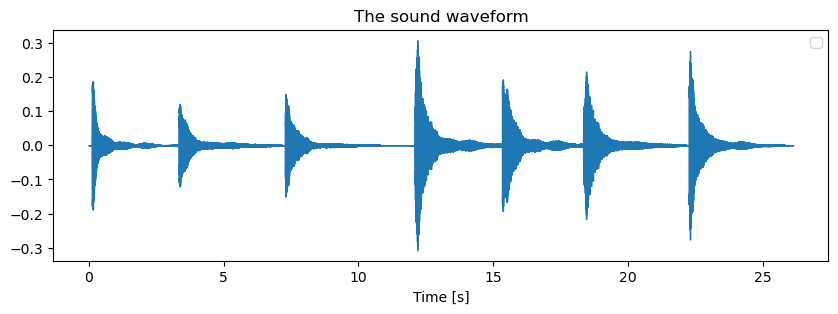

In [ ]:
# Import libraries
import math
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
import librosa
import librosa.display
import IPython.display as ipd

# Load audio recording signal
audio_file = 'piano_mix.wav'
#audio_file = 'plion_dream.wav'
sample_rate = 5512
audio_sound, sr = librosa.load(audio_file, sr = sample_rate)

# Display audio
ipd.Audio(audio_sound,rate = sr)

# Plotting the sound's signal waveform
fig, ax = plt.subplots(figsize=(10, 3))
librosa.display.waveshow(audio_sound, sr=sr, ax=ax,x_axis='time')
ax.set(title='The sound waveform', xlabel='Time [s]')
ax.legend()

### Calcul de la Transformée de Fourier à court terme (STFT)

Un signal audio est temporellement variable : ses composantes fréquentielles évoluent au fil du temps. Pour analyser cela, on utilise la STFT (Short-Term Fourier Transform), qui décompose le signal en petits segments temporels, puis applique la transformée de Fourier sur chaque segment.

La STFT produit des coefficients complexes contenant :
- l’amplitude (intensité des fréquences),
- la phase (décalage temporel de la fréquence).

#### Qu’est-ce qu’un spectrogramme ?

Le spectrogramme est une représentation visuelle du signal audio :

- Colonnes : les différentes fenêtres temporelles (évolution dans le temps),

- Lignes : les différentes fréquences,

- Valeurs : l’énergie des fréquences à chaque moment donné (amplitude au carré de la STFT).

Le spectrogramme est obtenu en prenant le carré du module (ou magnitude) de la STFT :

![Texte alternatif](https://miro.medium.com/v2/resize:fit:448/format:webp/1*qQUehad6mSzVIqPGOmyxxQ.png)

Text(0.5, 1.0, 'Audio spectrogram')

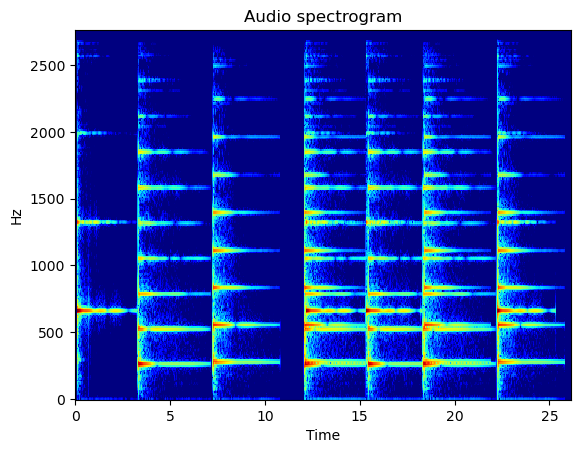

In [ ]:

# Define the hop length
HOP = 256

# Return the complex Short Term Fourier Transform
sound_stft = librosa.stft(audio_sound, n_fft = 512, hop_length = HOP)

# Magnitude Spectrogram
sound_stft_Magnitude = np.abs(sound_stft)

# Phase spectrogram
sound_stft_Angle = np.angle(sound_stft)

#Plot Spectogram
Spec = librosa.amplitude_to_db(sound_stft_Magnitude, ref = np.max)
librosa.display.specshow(Spec,y_axis = 'hz',sr=sr,hop_length=HOP,x_axis ='time',cmap= matplotlib.cm.jet)
plt.title('Audio spectrogram')

#### Utilisation dans la NMF :

![Texte alternatif](https://miro.medium.com/v2/resize:fit:1100/format:webp/1*G8im8-Q5pQTUKx6Yg6AIFg.png)

On va utiliser ce spectrogramme comme matrice de données V dans l’algorithme NMF, car :

- Il représente bien l’évolution fréquentielle d’un signal audio.

- Et surtout, ses valeurs sont toutes positives ou nulles, ce qui respecte la contrainte de non-négativité de la NMF.

### Appliquer la Factorisation en Matrices Non-Négatives (NMF)

L’algorithme de NMF est assez simple à implémenter une fois les règles de mise à jour dérivées pour la divergence β. Il se déroule en 3 étapes principales :

- Initialiser aléatoirement les matrices W et H avec des valeurs non négatives.

- Mettre à jour W et H en gardant l’autre fixe.

- Répéter l’étape 2 jusqu’à atteindre un seuil de convergence.

### Implémentation :

On commence par définir une fonction de coût basée sur la divergence β.

Puis on définit une fonction principale pour exécuter l’algorithme NMF.

In [ ]:

def divergence(V,W,H, beta = 2):
    
    """
    beta = 2 : Euclidean cost function
    beta = 1 : Kullback-Leibler cost function
    beta = 0 : Itakura-Saito cost function
    """ 
    
    if beta == 0 : return np.sum( V/(W@H) - math.log10(V/(W@H)) -1 )
    
    if beta == 1 : return np.sum( V*math.log10(V/(W@H)) + (W@H - V))
    
    if beta == 2 : return 1/2*np.linalg.norm(W@H-V)

In [ ]:
def NMF(V, S, beta = 2,  threshold = 0.05, MAXITER = 5000): 
    
    """
    inputs : 
    --------
        V         : Mixture signal : |TFST|
        S         : The number of sources to extract
        beta      : Beta divergence considered, default=2 (Euclidean)
        threshold : Stop criterion 
        MAXITER   : The number of maximum iterations, default=1000                                                     
    
    outputs :
    ---------
        W : dictionary matrix [KxS], W>=0
        H : activation matrix [SxN], H>=0
        cost_function : the optimised cost function over iterations
       
   Algorithm : 
   -----------
   
    1) Randomly initialize W and H matrices
    2) Multiplicative update of W and H 
    3) Repeat step (2) until convergence or after MAXITER   
    """
    
    counter = 0
    cost_function = []
    beta_divergence = 1
    
    K, N = np.shape(V)
    
    # Initialisation of W and H matrices : The initialization is generally random
    W = np.abs(np.random.normal(loc=0, scale = 2.5, size=(K,S)))    
    H = np.abs(np.random.normal(loc=0, scale = 2.5, size=(S,N)))

    while beta_divergence >= threshold and counter <= MAXITER:
        
        # Update of W and H
        H *= (W.T@(((W@H)**(beta-2))*V))/(W.T@((W@H)**(beta-1)) + 10e-10)
        W *= (((W@H)**(beta-2)*V)@H.T)/((W@H)**(beta-1)@H.T + 10e-10)
        
        # Compute cost function
        beta_divergence =  divergence(V,W,H, beta = 2)
        cost_function.append( beta_divergence )
        counter += 1
       
    return W,H, cost_function

Text(0, 0.5, 'Beta Divergence for beta = 2 ')

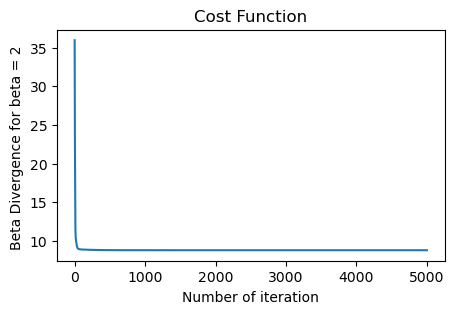

In [ ]:
V = sound_stft_Magnitude + 1e-10
beta = 2
S = 4 

# Applying the NMF function
W, H, cost_function = NMF(V,S,beta = beta, threshold = 0.05, MAXITER = 5000) 

# Ploting the cost function
plt.figure(figsize=(5,3))
plt.plot(cost_function)
plt.title("Cost Function")
plt.xlabel("Number of iteration")
plt.ylabel(f"Beta Divergence for beta = {beta} ")

### Exécution de l’algorithme :

On applique l’algorithme NMF à la matrice de données V (le spectrogramme).

Visualisation des résultats :

- À gauche : les matrices W et H initialisées aléatoirement.

- À droite : W, H et WH après 5000 itérations.

![Texte alternatif](https://miro.medium.com/v2/resize:fit:1100/format:webp/1*Dq5F2lgYJIrD2Tt9GeVCEg.png)

Même si le seuil de convergence n’a pas été atteint (car il était trop bas), on constate que la fonction de perte (coût) a chuté drastiquement, ce qui montre une bonne optimisation.

![Texte alternatif](https://miro.medium.com/v2/resize:fit:786/format:webp/1*88xDcb35RxmKQGjNRN-hkA.png)

![Texte alternatif](https://miro.medium.com/v2/resize:fit:720/format:webp/1*o20sX1uVWLnsi5l5es1sCw.png)

### Filtrage des différentes sources audio

Une fois que l’algorithme NMF a convergé, on peut reconstruire chaque source audio séparément.

Pour cela, on utilise :

- la kᵉ colonne de la matrice W (elle représente le "profil fréquentiel" de la source),

- la kᵉ ligne de la matrice H (elle décrit l'activation temporelle de cette source).

![Texte alternatif](https://miro.medium.com/v2/resize:fit:152/format:webp/1*OS9KtaY02KwXJQdIbdAloA.png)

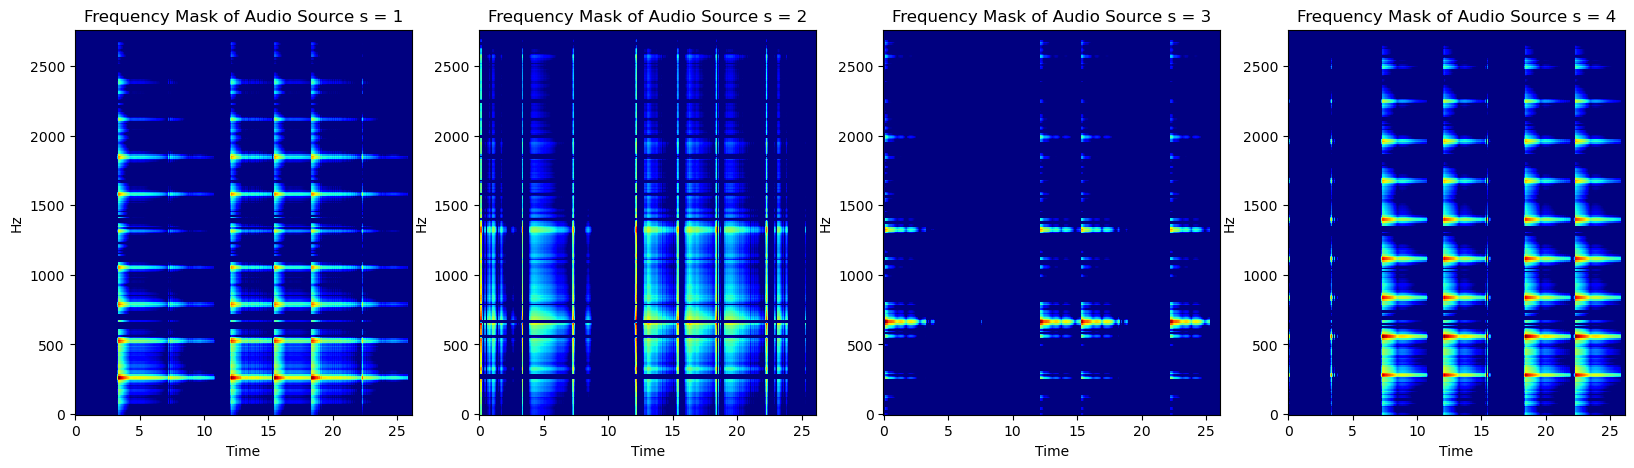

In [ ]:

#After NMF, each audio source S can be expressed as a frequency mask over time
f, axs = plt.subplots(nrows=1, ncols=S,figsize=(20,5))
filtered_spectrograms = []
for i in range(S):
    axs[i].set_title(f"Frequency Mask of Audio Source s = {i+1}") 
    # Filter eash source components
    filtered_spectrogram = W[:,[i]]@H[[i],:]
    # Compute the filtered spectrogram
    D = librosa.amplitude_to_db(filtered_spectrogram, ref = np.max)
    # Show the filtered spectrogram
    librosa.display.specshow(D,y_axis = 'hz', sr=sr,hop_length=HOP,x_axis ='time',cmap= matplotlib.cm.jet, ax = axs[i])
    
    filtered_spectrograms.append(filtered_spectrogram)

![Texte alternatif](https://miro.medium.com/v2/resize:fit:1100/format:webp/1*_l-DgwxnLCDjtZNNvrLHKQ.png)

### Reconstruction des signaux audio extraits

Une fois les sources séparées dans le spectrogramme, on peut reconstruire les signaux audio complets :

- On récupère la phase du signal original (calculée avec la STFT).

- On l’ajoute aux spectrogrammes filtrés des sources (car la NMF ne traite que l’amplitude).

- Puis on applique la transformée de Fourier inverse (ISTFT) pour reconstruire le son temporel.

In [ ]:
reconstructed_sounds = []
for i in range(S):
    reconstruct = filtered_spectrograms[i] * np.exp(1j*sound_stft_Angle)
    new_sound   = librosa.istft(reconstruct, n_fft = 512, hop_length = HOP)
    reconstructed_sounds.append(new_sound)

C:\Users\pc\AppData\Local\Temp\ipykernel_22484\3134692246.py:5: FutureWarning: waveshow() keyword argument 'x_axis' has been renamed to 'axis' in version 0.10.0.
	This alias will be removed in version 1.0.
  librosa.display.waveshow(reconstructed_sounds[i], sr=sr, color = colors[i], ax=ax[i],label=f'Source {i}',x_axis='time')


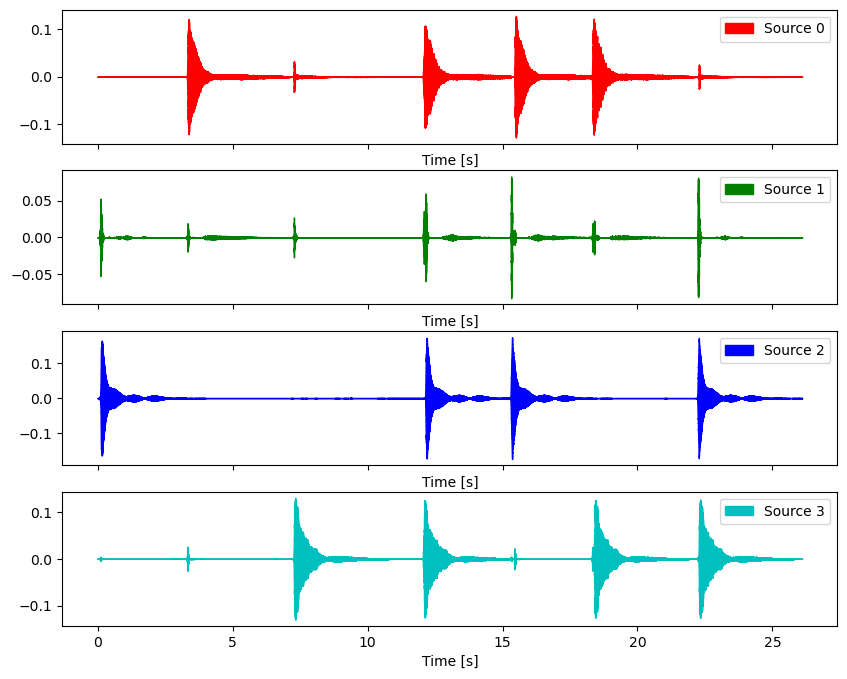

In [ ]:
# Tracing the waveform
colors = ['r', 'g','b', 'c']
fig, ax = plt.subplots(nrows=S, ncols=1, sharex=True, figsize=(10, 8))
for i in range(S):
    librosa.display.waveshow(reconstructed_sounds[i], sr=sr, color = colors[i], ax=ax[i],label=f'Source {i}',x_axis='time')
    ax[i].set(xlabel='Time [s]')
    ax[i].legend()

⚠️ Défi : choisir le bon nombre de sources

Un des défis majeurs de l’utilisation de la NMF pour la séparation audio est de choisir le bon nombre de sources S.
- Si S est trop bas, les sons seront mal séparés.
- Si S est trop élevé, on peut obtenir des artefacts ou des sur-segmentations.

➡️ Une méthode consiste à commencer avec un petit S, puis l’augmenter progressivement jusqu’à obtenir une séparation satisfaisante.

![Texte alternatif](https://miro.medium.com/v2/resize:fit:1100/format:webp/1*GHtwTqjvVgOXkreD7W9VFQ.png)

### 🎹 Exemple marquant :

En fixant S=4, le système a pu extraire le son du marteau du piano (en plus des notes).

Cela montre la capacité de la NMF à isoler non seulement les notes musicales, mais aussi les bruits mécaniques subtils (comme l’activation du marteau de piano).

![Texte alternatif](https://miro.medium.com/v2/resize:fit:1100/format:webp/1*L80DhOCFOggdWejM308_OA.png)

###  Conclusion

La NMF est une méthode puissante pour la séparation de sources audio, particulièrement adaptée aux signaux sonores :

- Elle respecte la non-négativité, ce qui correspond bien aux propriétés physiques de l’audio.

- Elle est interprétable : W = empreintes fréquentielles, H = activations temporelles.

- Elle fonctionne même sans apprentissage supervisé.

In [ ]:
import soundfile as sf

# Download the decomposed sounds
for i in range(S):
    sf.write(f"source_{i+1}.wav", reconstructed_sounds[i], sr)
    ipd.Audio(reconstructed_sounds[i], rate=sr)
